In [ ]:
#Проект 3 модуля по IT4Finance 
#Работу выполнили: Дробняк Милица, Алиев Мирзакиши, Испанова Анель
#Мы решили взять стратегию Momentum 
#По данным hist_price

In [7]:
# Импортируем классические модули для анализа данных: numpy и pandas для работы с датафреймами и векторами, и pyplot для графиков
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [8]:
# function for logistic regression
from sklearn.linear_model import LogisticRegression

In [9]:
df = pd.read_csv("hist_price.csv",sep=',') 
df.head(10)

,TIME,OPEN,LOW,HIGH,CLOSE
0,1,103.45,103.08,103.53,103.20
1,2,103.19,103.15,103.29,103.29
2,3,103.29,103.25,103.49,103.48
3,4,103.48,103.40,103.54,103.44
4,5,103.43,103.30,103.45,103.33
5,6,103.31,103.19,103.38,103.27
6,7,103.25,103.25,103.45,103.35
7,8,103.39,103.30,103.40,103.32
8,9,103.31,103.17,103.31,103.20
9,10,103.20,102.98,103.20,103.08


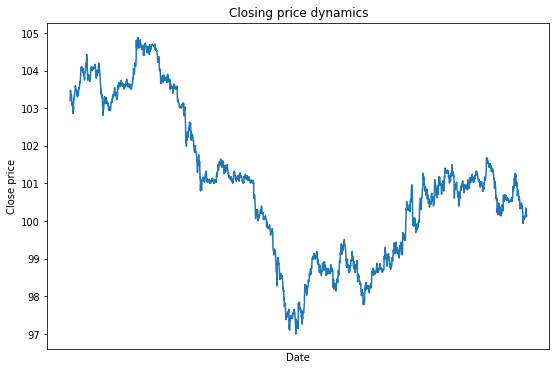

In [10]:
#построение графика цен закрытия
plt.figure (figsize=(9,6))
x=df['TIME']
y=df['CLOSE']
plt.plot(x,y)
plt.xticks([])
plt.xlabel('Date')
plt.ylabel('Close price')
plt.title('Closing price dynamics')
plt.show()

Виден ярко выраженный нисходящий тренд, далее тренд сменился на восходящий, но цена акции не достигла своего максимума.  

In [11]:
from scipy import stats

In [12]:
# Построим столбец доходностей
df['RETURN']= df['CLOSE'].pct_change()

In [13]:
#добавление столбцов: доходности, средней доходности по а значениям и по значениям а-1
a = 20
df['RETURN'] = df['CLOSE'] / df['CLOSE'].shift()-1
df['MA_RETURN'] = df['RETURN'].rolling(a).mean()
df['MA_RETURN_PREV'] = df['MA_RETURN'].shift()
df = df.dropna()
df.head(10)

,TIME,OPEN,LOW,HIGH,CLOSE,RETURN,MA_RETURN,MA_RETURN_PREV
21,22,103.37,103.23,103.48,103.38,0.000097,0.000044,0.000083
22,23,103.38,103.32,103.45,103.44,0.000580,-0.000019,0.000044
23,24,103.41,103.38,103.46,103.46,0.000193,0.000010,-0.000019
24,25,103.45,103.40,103.74,103.60,0.001353,0.000131,0.000010
25,26,103.56,103.49,103.74,103.56,-0.000386,0.000141,0.000131
26,27,103.53,103.49,103.58,103.52,-0.000386,0.000083,0.000141
27,28,103.55,103.49,103.57,103.50,-0.000193,0.000088,0.000083
28,29,103.50,103.47,103.54,103.48,-0.000193,0.000136,0.000088
29,30,103.48,103.48,103.50,103.49,0.000097,0.000199,0.000136
30,31,103.49,103.46,103.54,103.46,-0.000290,0.000151,0.000199


In [14]:
from scipy import stats

In [15]:
#mean value
mean = df['RETURN'].mean()

#standard deviation
std = df['RETURN'].std()

#median value
median = df['RETURN'].median()

#mode value
mode = stats.mode(df['RETURN'], nan_policy='omit')

In [16]:
print(mean)
print(std)
print(median)
print(mode[0][0])

-1.5044016806087682e-05
0.0009192779257052059
0.0
0.0


In [17]:
skew = df['RETURN'].skew()
kurtosis = df['RETURN'].kurtosis()
print(skew)
print(kurtosis)

0.05421526623452818
5.101283196693037


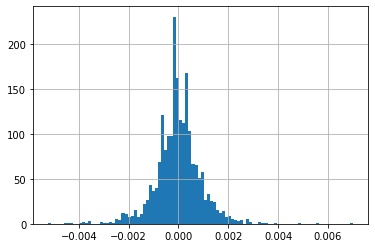

In [18]:
df['RETURN'].hist(bins=100)

# Show the plot
plt.show()

Мы видим, что среднее приблизительно равно 0 и стандартное отклонение довольно низкое, skewness около нуля, а kurtosis чуть выше 5, что может говорить о нормальности распределения. К тому же, график распределения похож на график нормального (приблизительно похож).
Проведем тесты на нормальность распределения доходностей.

In [19]:
from scipy.stats import shapiro
# Проведем тест Шапиро-Уилка (H0: распределение нормальное)
shapiro_results = shapiro(df['RETURN'][1:])
print("Shapiro results:", shapiro_results)

Shapiro results: (0.9459132552146912, 7.638349093004574e-27)


In [20]:
if shapiro_results[1] < 0.05:
    print("Доходности не распределены нормально")
else:
    print("Доходности распределены нормально")

Доходности не распределены нормально


In [21]:
# Проведем D'Agostino's K-squared test, использующий критерии skewness и kurtosis
k2, p = stats.normaltest(df['RETURN'], nan_policy='omit')
print(p)

2.7629642156085315e-52


In [22]:
if p < 0.05:
    print("Доходности не распределены нормально")
else:
    print("Доходности распределены нормально")

Доходности не распределены нормально


In [23]:
# Построим, наконец, вектор returns
returns = df['RETURN'][1:].values
returns

array([ 5.80383053e-04,  1.93348801e-04,  1.35317997e-03, ...,
       -9.96512207e-05, -4.98305760e-04, -1.59537342e-03])

In [24]:
returns[210]

0.00048248576667009324

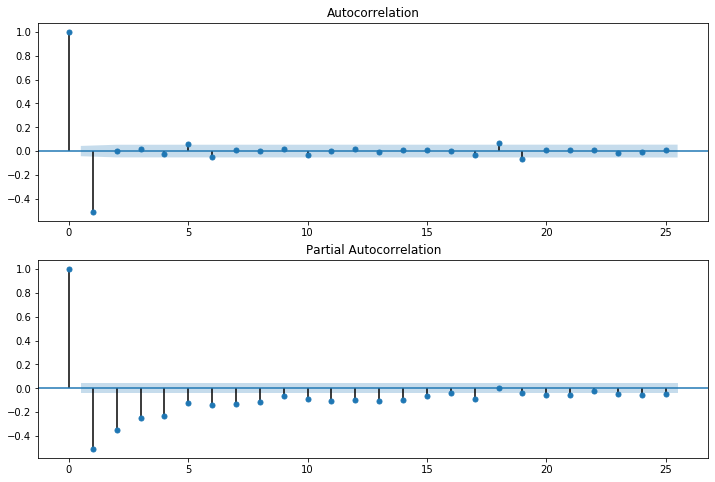

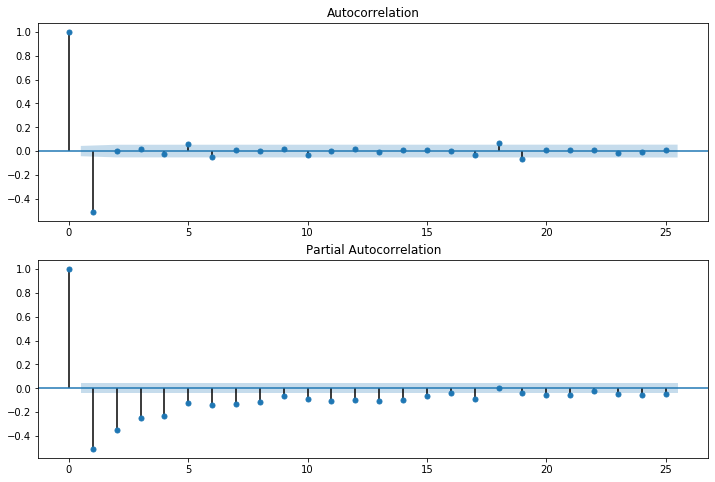

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
# для посчёта функции при разных значениях лага

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
plot_acf(df.RETURN.diff().dropna(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
plot_pacf(df.RETURN.diff().dropna(), lags=25, ax=ax2)

Мы создали двухмерные графики частичной автокорреляции для первых 25 лагов

In [26]:
# импортируем библиотеку и проводим тест Колмогорова-Смирнова на определения нормальности распределения доходностей
# Нулевая гипотеза: Доходности распределены нормально
from scipy.stats import kstest

In [27]:
ad = kstest(df['RETURN'][21:2080],'norm')
print(ad)

KstestResult(statistic=0.4979166533049981, pvalue=0.0)


Нулевая гипотеза отвергнута, поскольку p-value равна нулю. Следовательно, доходность не распределена нормально. Поэтому сделаем вывод о нормальности распределения доходностей. Далее будем основываться на данной предпосылке.

In [28]:
#Проверка стационарности распределения доходностей

In [29]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
test = sm.tsa.adfuller(df['RETURN'][1:207])
print ('adf: ', test[0]) 
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -13.4600661795154
p-value:  3.5442509185359026e-25
Critical values:  {'1%': -3.4626576734812318, '5%': -2.8757444215841326, '10%': -2.5743412314098753}
единичных корней нет, ряд стационарен


In [30]:
import matplotlib.pyplot as plt
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['RETURN'][1:2079])[1])
plt.tight_layout()

Критерий Дики-Фуллера: p=0.000000


<Figure size 432x288 with 0 Axes>

Таким образом, ряд стационарен. Поэтому приведение ряда к стационарному не требуется.

In [31]:
returns = df['RETURN'].values
MA_returns = df['MA_RETURN'].values
MA_returns_prev = df['MA_RETURN_PREV'].values
print(len(returns))

2059


In [32]:
#стратегия Momentum
profit_m=[]
for i in range(0,len(returns)-20):  # 20 наблюдений забираем на обучение (определение скользящего среднего)
    mean = returns[i:i+19].mean()
    if (mean>0 and returns[i+20]>0) or (mean<0 and returns[i+20]<0):
        profit_m.append(abs(returns[i+20]))
    elif (mean>0 and returns[i+20]<0) or (mean<0 and returns[i+20]>0):
        profit_m.append(-abs(returns[i+20]))
    elif mean==0 or returns[i+20]==0:
        profit_m.append(0)

In [33]:
len(profit_m)

2039

In [34]:
#Графики доходностей 
buynhold = []
for i in range(0, len(returns)):
    buynhold.append(sum(returns[0:i+1]))

In [35]:
momentum = []
for i in range(0, len(profit_m)):
    momentum.append(sum(profit_m[0:i+1]))

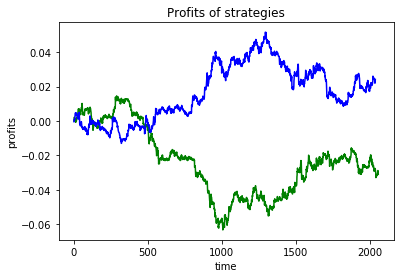

In [36]:
plt.plot(buynhold, color='green') 
plt.plot(momentum, color='blue')
plt.xlabel('time')
plt.ylabel('profits')
plt.title('Profits of strategies')
plt.show()

По графику видно, что почти половину года лидировала стратегия momentum. Стратегия buy and hold большую часть года проседала, но в конце улучшила показатели.

In [37]:
# Суть стратегии: если МА больше нуля открываем длинную позицию, если меньше - короткую, если равна 0 - ничего не делаем
# Посчитаем доходности по каждой сделки
profits_momentum = [] 
for i in range(0, len(MA_returns_prev)):

    if (MA_returns_prev[i] > 0 and returns[i]>0) or (MA_returns_prev[i] < 0 and returns[i]<0):
        profits_momentum.append(abs(returns[i]))
    elif (MA_returns_prev[i] > 0 and returns[i]<0) or (MA_returns_prev[i] < 0 and returns[i]>0):
        profits_momentum.append(-abs(returns[i]))
    elif MA_returns_prev[i]==0 or returns[i]==0:
        profits_momentum.append(0)
print(profits_momentum)
print(len(profits_momentum))

[9.673986649882949e-05, 0.0005803830528148257, -0.00019334880123733633, 0.0013531799729364913, -0.0003861003861003187, -0.00038624951718813083, -0.00019319938176198814, -0.00019323671497584183, 9.66370313102427e-05, -0.000289883080490827, -0.0009665571235258907, -0.00029024767801855145, 0.0002903319461917686, -0.0005804953560372139, 0.0009680542110359625, 0.0005802707930366857, -0.0010632128358786241, 0.0003870343492986539, 0.0008704903762453142, 0.0006764592191728092, -0.00038628681796226694, 0.0004830451164139493, 0, 0.0011587485515642815, 0.00028935185185163803, -0.00028926815157637176, 0.0004822530864196928, 0.0014460618914489132, 0.0009626492106278306, 0.0009617234083476589, 0, -9.607993850890839e-05, 0.00028826751225130565, -0.000768491834774232, 0.0006729475100943905, -0.0006724949562878502, 0.000480676792924406, -0.00019217834150087043, -0.0009610764055741905, 0.0009620009620008307, -0.00028832292167224605, -0.0007690828686790496, -9.620935154885935e-05, -0.0007697488694314858,

In [38]:
#Далее вторая часть наше работы идет в R и также вариант в Python

In [39]:
# define alpha function. See work assignment for details
def lar (df, p_up, p_down, size = 1000, zero = 0):
    lag3 = df.iloc[1:, -1]
    lag3.index = pd.RangeIndex(start=1, stop=len(df.index), step=1)
    lag2 = df.iloc[2:, -1]
    lag2.index = pd.RangeIndex(start=1, stop=len(df.index)-1, step=1)
    lag1 = df.iloc[3:, -1]
    lag1.index = pd.RangeIndex(start=1, stop=len(df.index) - 2, step=1)
    lag0 = df.iloc[4:, -1]
    lag0.index = pd.RangeIndex(start=1, stop=len(df.index)- 3, step=1)
    period = df.iloc[4:, 1]
    period.index = pd.RangeIndex(start=1, stop=len(df.index)- 3, step=1)
    df_w = pd.DataFrame({'period': period, 'lag0': lag0, 'lag1': lag1, 'lag2': lag2, 'lag3': lag3 })
    df_w = df_w.head(-3)
    df_w['increase'] = np.where(df_w['lag0'] > zero, True, False)
    df_w['decrease'] = np.where(df_w['lag0'] < -zero, True, False)
    
    bull = []
    bear = []
    position = []
    for t in range(size, len(df_w.index)):
        # model for bull
        X=df_w.iloc[(t-size):t, :][['lag1', 'lag2', 'lag3']]
        y=df_w.iloc[(t-size):t, :]['increase']
        logreg = LogisticRegression(random_state=0, solver='lbfgs')
        logreg.fit(X, y)
        p_bull = logreg.predict_proba(df_w.iloc[[t]][['lag1', 'lag2', 'lag3']])[:, 1].tolist()[0]
        bull.append(p_bull)
        # model for bear
        X=df_w.iloc[(t-size):t, :][['lag1', 'lag2', 'lag3']]
        y=df_w.iloc[(t-size):t, :]['decrease']
        logreg = LogisticRegression(random_state=0, solver='lbfgs')
        logreg.fit(X, y)
        p_bear = logreg.predict_proba(df_w.iloc[[t]][['lag1', 'lag2', 'lag3']])[:, 1].tolist()[0]
        bear.append(p_bear)
        if p_bull > p_up and p_bear > p_down:
            position.append(0)
        elif p_bull > p_up and p_bear <= p_down:
            position.append(1)
        elif p_bull <= p_up and p_bear > p_down:
            position.append(-1)
        else:
            position.append(0)
    df_w['bull'] = pd.Series(bull, index = range(size + 1, len(df_w.index) + 1))
    df_w['bear'] = pd.Series(bear, index = range(size + 1, len(df_w.index) + 1))
    df_w['position'] = pd.Series(position, index = range(size + 1, len(df_w.index) + 1))
    return df_w

In [41]:
# check it
res_lar = lar(df.iloc[0:(1000 + 100), :], 0.5, 0.5)
res_lar.iloc[(1000 - 2):, :]

,period,lag0,lag1,lag2,lag3,increase,decrease,bull,bear,position
999,97.65,0.000133,0.000164,0.000283,0.000267,True,False,NaN,NaN,NaN
1000,97.55,0.000108,0.000133,0.000164,0.000283,True,False,NaN,NaN,NaN
1001,97.55,0.000031,0.000108,0.000133,0.000164,True,False,0.388008,0.611992,-1.0
1002,97.41,-0.000036,0.000031,0.000108,0.000133,False,True,0.388006,0.611994,-1.0
1003,97.27,-0.000087,-0.000036,0.000031,0.000108,False,True,0.387003,0.612997,-1.0
...,...,...,...,...,...,...,...,...,...,...
1092,99.00,0.000137,0.000177,0.000273,0.000274,True,False,0.387013,0.612987,-1.0
1093,99.01,0.000147,0.000137,0.000177,0.000273,True,False,0.387011,0.612989,-1.0
1094,99.01,0.000213,0.000147,0.000137,0.000177,True,False,0.388009,0.611991,-1.0
1095,99.00,0.000208,0.000213,0.000147,0.000137,True,False,0.389009,0.610991,-1.0


In [46]:
size_s = round(len(df)*2/3)           # размер датасета sample
size_oos = len(df) - size_s 

In [47]:
print(len(df), size_s, size_oos)

2059 1373 686


In [48]:
# Делим выборку на обучающую и тестовую
sample = df[0:size_s]
out_of_sample = df[size_s:]

In [49]:
sample.tail()

,TIME,OPEN,LOW,HIGH,CLOSE,RETURN,MA_RETURN,MA_RETURN_PREV
1389,1390,98.61,98.60,98.63,98.61,0.000101,0.000153,0.000148
1390,1391,98.61,98.60,98.64,98.60,-0.000101,0.000148,0.000153
1391,1392,98.61,98.60,98.68,98.60,0.000000,0.000132,0.000148
1392,1393,98.60,98.56,98.66,98.63,0.000304,0.000204,0.000132
1393,1394,98.66,98.62,98.66,98.64,0.000101,0.000163,0.000204


In [50]:
out_of_sample.head()

,TIME,OPEN,LOW,HIGH,CLOSE,RETURN,MA_RETURN,MA_RETURN_PREV
1394,1395,98.63,98.61,98.76,98.69,0.000507,0.000015,0.000163
1395,1396,98.68,98.65,98.74,98.73,0.000405,0.000041,0.000015
1396,1397,98.74,98.72,98.80,98.80,0.000709,0.000086,0.000041
1397,1398,98.79,98.75,98.92,98.88,0.000810,0.000137,0.000086
1398,1399,98.88,98.75,98.90,98.77,-0.001112,0.000036,0.000137


In [51]:
#Маржинальная стратегия 
# исполняем маржинальную стратегию на рост с барьерным значением 0.5
s_bar_up = lar(sample, 0.5, 1.42)              #подставить после sample, чтобы не ждать .iloc[0:3000, :]

In [52]:
# Считаем доход от нашей стратегии: если угадали, то знак перемножения будущей доходности и взятой позиции больше нуля
s_bar_up['profit'] = s_bar_up['lag0']*s_bar_up['position']

In [53]:
s_bar_up.tail(10)

,period,lag0,lag1,lag2,lag3,increase,decrease,bull,bear,position,profit
1360,98.62,0.000265,0.000234,0.000255,0.000260,True,False,0.353014,0.646986,0.0,0.0
1361,98.60,0.000178,0.000265,0.000234,0.000255,True,False,0.353014,0.646986,0.0,0.0
1362,98.60,0.000199,0.000178,0.000265,0.000234,True,False,0.353013,0.646987,0.0,0.0
1363,98.69,0.000204,0.000199,0.000178,0.000265,True,False,0.353012,0.646988,0.0,0.0
1364,98.67,0.000183,0.000204,0.000199,0.000178,True,False,0.353011,0.646989,0.0,0.0
1365,98.61,0.000148,0.000183,0.000204,0.000199,True,False,0.353011,0.646989,0.0,0.0
1366,98.61,0.000153,0.000148,0.000183,0.000204,True,False,0.354011,0.645989,0.0,0.0
1367,98.61,0.000148,0.000153,0.000148,0.000183,True,False,0.354010,0.645990,0.0,0.0
1368,98.60,0.000132,0.000148,0.000153,0.000148,True,False,0.355009,0.644991,0.0,0.0
1369,98.66,0.000204,0.000132,0.000148,0.000153,True,False,0.356009,0.643991,0.0,0.0


In [58]:
from sklearn.metrics import roc_curve, roc_auc_score          # импорт библиотеки для построения ROC-curve 

In [59]:
# Список с барьерными значениями
prob=np.arange(0, 1, 0.05)
prob

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [60]:
# Танец с бубном, чтобы привести классификацию в бинарный вид: 1 для роста и -1 для падения/отсутствия движения
# Только там можно будет посчитать AUC
signs = np.sign(s_bar_up['lag0'])
for i in range (1, len(signs)):
    if signs[i] == 0.0:
        signs[i] = -1.0

In [61]:
s_bar_up['true'] = signs

In [62]:
# Функция считает fpr и tpr за нас
fpr, tpr, thresholds = roc_curve(s_bar_up['true'][1001:], s_bar_up['bull'][1001:], pos_label=1)

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt

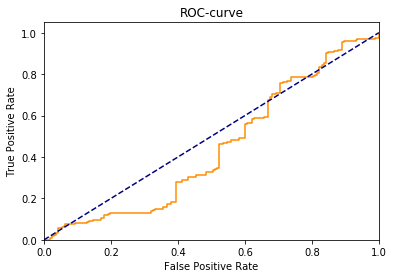

In [64]:
# Строим график ROC-кривой
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.show()

In [65]:
import math

In [66]:
def calculateDistance(x1,y1,x2,y2):
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return dist      

In [67]:
# Посчитаем расстояние от точки ROC-curve до точки (0,1)
ROC_dist=[]
for i in range (0, len(fpr)):
    ROC_dist.append(calculateDistance(fpr[i], tpr[i], 0, 1))

In [68]:
#Найдем лучшие барьерные вероятности, которые соответствуют высшему показателю AUC и total_profit
max_auc = 0
index_auc = 0
max_profit = 0
total_profit = []
index_prof = 0
test = sample.iloc[0:(2000), :]

for i in range(0, len(prob)):
    test_up = lar(test, prob[i], 1.42)
    
    signs_up = np.sign(test_up['lag0'])
    for j in range (1, len(signs_up)):
        if signs_up[j] == 0.0:
            signs_up[j] = -1.0     
    test_up['true'] = signs_up
    
    test_up['profit'] = test_up['lag0']*test_up['position']
    prof = sum(test_up['profit'][1001:])
    total_profit.append(prof)
    if prof > max_profit:
        max_profit = prof
        index_prof = i
        
    auc = roc_auc_score(test_up['true'][1001:], test_up['bull'][1001:])
    if auc > max_auc:
        max_auc = auc
        index_auc = i

In [69]:
# Барьерное значение, соответствующее максимальному AUC 
prob[index_auc]

0.0

In [70]:
total_profit

[0.01145498475881298,
 0.01145498475881298,
 0.01145498475881298,
 0.01145498475881298,
 0.01145498475881298,
 0.01145498475881298,
 0.01145498475881298,
 0.014485540109495447,
 0.00041365368323977296,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [72]:
# Барьерное значение, соответствующее максимальной ликвидационной стоимости портфеля
prob[index_prof]

0.35000000000000003

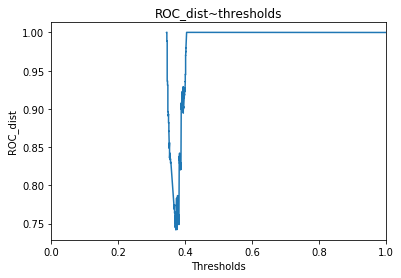

In [73]:
# Строим график ROC_dist ~ thresholds
plt.figure()
plt.plot(thresholds, ROC_dist)
plt.title('ROC_dist~thresholds')
plt.xlim([0.0, 1.0])
plt.xlabel('Thresholds')
plt.ylabel('ROC_dist')
plt.show()

In [74]:
thresholds[ROC_dist.index(min(ROC_dist))]

0.3720152783746953

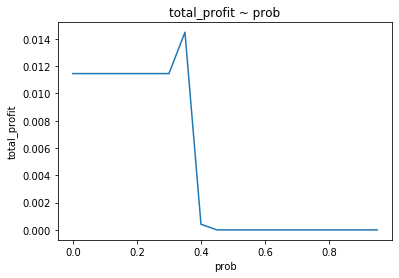

In [75]:
# Строим график total_profit ~ prob
plt.figure()
plt.plot(prob, total_profit)
plt.title('total_profit ~ prob')
plt.xlabel('prob')
plt.ylabel('total_profit')
plt.show()

Как было показано выше, наивысший total_profit при барьерном значении, равном 0,014

In [77]:
buynhold = []
ret = sample['RETURN'][1000:2000].tolist()
for i in range(0, len(ret)):
    buynhold.append(sum(ret[0:i+1]))

In [78]:
half_up = sumprofit[1000:2000]

In [79]:
# Напишем функцию, которая будет считать накопленную доходность
def sumpr (traintest, p_up, p_down):
    sumprof = []
    
    df = lar(traintest[:2000], p_up, p_down)  
    df['profit'] = df['lag0']*df['position']

    # переведем столбец доходности в список для удобства счета накопленной доходности
    profit = df['profit'][1000:].tolist()   #первая тысяча наблюдений - наны, они не посчитаются в прибыль

    for i in range(0, len(profit)):
            sumprof.append(sum(profit[0:i+1]))
    return sumprof

In [80]:
sroc_prof = sumpr(sample, 0, 1.42)   # исполняем маржинальную стратегию на рост с барьерным значением 0
stot_prof = sumpr(sample, 0.35, 1.42)  # исполняем маржинальную стратегию на рост с барьерным значением 0.35

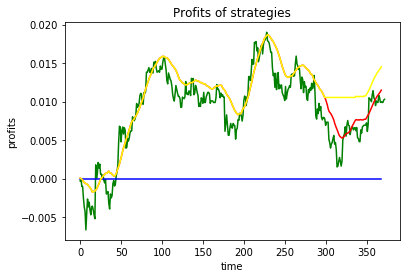

In [81]:
plt.plot(buynhold, color='green') 
plt.plot(half_up, color='blue')
plt.plot(sroc_prof, color='red')
plt.plot(stot_prof, color='yellow')
plt.xlabel('time')
plt.ylabel('profits')
plt.title('Profits of strategies')
plt.show()

In [92]:
oos_buynhold = []
oos_ret = out_of_sample['RETURN'][1000:2000].tolist()        # учитываем тысячу наблюдений на обучение
for i in range(0, len(oos_ret)):
    oos_buynhold.append(sum(oos_ret[0:i+1]))

In [93]:
# исполняем маржинальную стратегию на рост с барьерным значением 0.5
oos_half_up = sumpr(out_of_sample, 0.5, 1.42)

In [96]:
oos_sroc_prof = sumpr(out_of_sample, 0, 1.42)   # маржинальная стратегию на рост с барьерным значением 0
oos_stot_prof = sumpr(out_of_sample, 0.30, 1.42)  # маржинальная стратегию на рост с барьерным значением 0.30

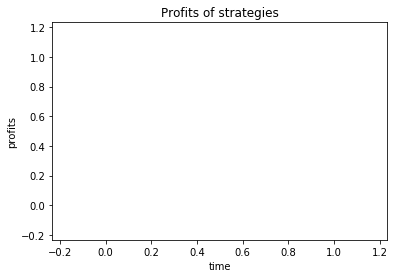

In [97]:
plt.plot(oos_buynhold, color='green') 
plt.plot(oos_half_up, color='blue')
plt.plot(oos_sroc_prof, color='red')
plt.plot(oos_stot_prof, color='yellow')
plt.xlabel('time')
plt.ylabel('profits')
plt.title('Profits of strategies')
plt.show()

In [ ]:
#Почему-то не получилось 

In [98]:
# исполняем маржинальную стратегию на рост с барьерным значением 0.5
s_bar_down = lar(sample, 1.42, 0.5)          #подставить после sample, чтобы не ждать .iloc[0:3000, :]

In [99]:
# Считаем доход от нашей стратегии: если угадали, то знак перемножения будущей доходности и взятой позиции больше нуля
s_bar_down['profit'] = s_bar_up['lag0']*s_bar_up['position']

In [100]:
# Построим список с накопленной доходностью
sp_down = []
profit_down = s_bar_down['profit'].tolist()
for i in range(0, len(profit_down)):
    if profit_down[i] == 'nan':
        sp_down.append(0)
    else:
        sp_down.append(sum(profit_down[1001:i]))     # потому что первая тысяча наблюдений - обучающее окно

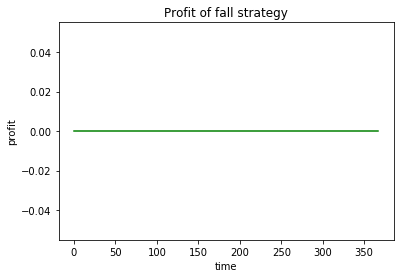

In [101]:
plt.plot(sp_down[1001:], color='green') 
plt.xlabel('time')
plt.ylabel('profit')
plt.title('Profit of fall strategy')
plt.show()

In [42]:
dfo = pd.read_csv("OrderLog20150302.txt",sep=',')   
dft = pd.read_csv("TradeLog20150302.txt",sep=',')

In [60]:
dfo = dfo.loc[dfo['SECCODE'] == 'TATN']
dft = dft.loc[dft['SECCODE'] == 'TATN']

In [61]:
dfo.head()

,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE
56,57,TATN,S,100000000,57,1,319.80,900,NaN,NaN
230,231,TATN,B,100000000,231,1,309.70,10,NaN,NaN
242,243,TATN,S,100000000,243,1,319.85,900,NaN,NaN
413,414,TATN,B,100000000,414,1,309.70,10,NaN,NaN
581,582,TATN,S,100000000,582,1,319.90,200,NaN,NaN


In [62]:
dft.head()

,TRADENO,SECCODE,TIME,BUYORDERNO,SELLORDERNO,PRICE,VOLUME
3,2460134735,TATN,100000,2088,10487,318.85,1940
196,2460134932,TATN,100001,2088,11694,318.85,800
197,2460134933,TATN,100001,2088,11707,318.85,340
198,2460134934,TATN,100001,2088,11713,318.85,1000
199,2460134935,TATN,100001,2088,11718,318.85,730


In [65]:
index_min = []        # в этом списке будут индексы строк, в которых наступает новая минута. Будем использовать это 
# для вычисления цен открытия, закрытия, низших и высших цен за минуту
time = dft['TIME'].tolist()
t = 100000            # начальное время
for i in range(0, len(time)):
    if time[i] >= t:       # если наступает новая минута
        index_min.append(i)
        t = t+100      # прибавляем минуту к счетчику

In [66]:
index_min

[0,
 97,
 158,
 228,
 245,
 275,
 311,
 328,
 348,
 381,
 405,
 423,
 427,
 446,
 550,
 570,
 575,
 579,
 582,
 609,
 621,
 662,
 681,
 698,
 705,
 710,
 714,
 717,
 722,
 724,
 749,
 776,
 824,
 829,
 840,
 869,
 909,
 940,
 943,
 946,
 959,
 962,
 972,
 1066,
 1083,
 1097,
 1127,
 1187,
 1195,
 1205,
 1209,
 1225,
 1245,
 1257,
 1270,
 1276,
 1289,
 1318,
 1352,
 1431,
 1544,
 1545,
 1546,
 1547,
 1548,
 1549,
 1550,
 1551,
 1552,
 1553,
 1554,
 1555,
 1556,
 1557,
 1558,
 1559,
 1560,
 1561,
 1562,
 1563,
 1564,
 1565,
 1566,
 1567,
 1568,
 1569,
 1570,
 1571,
 1572,
 1573,
 1574,
 1575,
 1576,
 1577,
 1578,
 1579,
 1580,
 1581,
 1582,
 1583,
 1584,
 1585,
 1597,
 1679,
 1703,
 1716,
 1738,
 1752,
 1778,
 1849,
 1861,
 1883,
 1914,
 1952,
 1967,
 1984,
 2008,
 2017,
 2021,
 2083,
 2089,
 2127,
 2141,
 2187,
 2240,
 2271,
 2275,
 2292,
 2306,
 2336,
 2356,
 2376,
 2390,
 2558,
 2584,
 2642,
 2776,
 2785,
 2806,
 2842,
 2859,
 2869,
 2914,
 2928,
 2945,
 2953,
 2998,
 3042,
 3064,
 30

In [67]:
len(index_min)       # в итоговом датафрейме у нас 840 минут / значений будет. Цен каждого вида тоже должно быть 840

840

In [68]:
price = dft['PRICE'].tolist()
price_open = []
for i in range(0, len(index_min)):
    price_open.append(price[index_min[i]])     # цена открытия - это цена первой сделки за минуту

In [69]:
price_open

[318.85,
 319.4,
 318.9,
 318.85,
 318.9,
 318.9,
 319.2,
 319.0,
 319.1,
 319.7,
 320.0,
 319.7,
 319.65,
 319.9,
 321.0,
 320.45,
 320.05,
 319.25,
 319.65,
 318.85,
 318.6,
 317.6,
 317.3,
 318.3,
 318.35,
 317.95,
 317.75,
 317.4,
 317.5,
 317.3,
 317.05,
 317.05,
 318.1,
 317.75,
 317.9,
 317.9,
 318.05,
 318.6,
 318.7,
 318.65,
 318.3,
 318.0,
 318.0,
 318.75,
 318.4,
 318.45,
 318.95,
 319.55,
 318.6,
 318.7,
 318.7,
 318.75,
 318.75,
 319.55,
 319.5,
 319.45,
 319.7,
 320.3,
 320.1,
 320.9,
 320.65,
 320.6,
 320.95,
 320.95,
 321.0,
 321.0,
 321.0,
 321.0,
 321.1,
 321.05,
 321.7,
 321.7,
 321.7,
 321.7,
 321.85,
 321.85,
 321.85,
 321.9,
 321.85,
 321.9,
 321.9,
 321.85,
 321.85,
 321.75,
 321.6,
 321.9,
 321.9,
 321.9,
 321.9,
 321.9,
 322.0,
 322.0,
 322.0,
 322.0,
 322.0,
 322.0,
 322.0,
 322.0,
 322.0,
 321.8,
 322.0,
 322.0,
 322.15,
 322.35,
 321.5,
 321.6,
 321.7,
 321.35,
 321.5,
 322.4,
 322.1,
 322.2,
 320.85,
 320.55,
 320.6,
 320.8,
 321.05,
 321.25,
 321.3,
 321.3

In [70]:
len(price_open)

840

In [71]:
price_close = []
for i in range(0, len(index_min)):
    if i < len(index_min)-1:
        price_close.append(price[index_min[i+1]-1])    # цена закрытия - это цена последней сделки за минуту (последней
    else:                                              # до перехода на следующую минуту)
        price_close.append(price[-1])

In [72]:
price_close

[319.45,
 319.1,
 318.85,
 318.85,
 319.25,
 319.25,
 319.25,
 319.35,
 319.95,
 320.0,
 319.95,
 319.8,
 319.4,
 321.1,
 320.05,
 320.05,
 319.9,
 319.75,
 319.0,
 318.95,
 317.6,
 317.4,
 318.15,
 318.35,
 317.95,
 317.75,
 317.75,
 317.7,
 317.4,
 317.15,
 317.05,
 318.2,
 318.2,
 317.95,
 317.85,
 318.15,
 318.75,
 318.7,
 318.65,
 318.3,
 318.25,
 318.0,
 318.75,
 318.6,
 318.45,
 318.95,
 319.6,
 318.75,
 318.75,
 318.75,
 318.75,
 319.1,
 319.55,
 319.5,
 319.7,
 319.7,
 320.3,
 320.1,
 320.9,
 321.0,
 320.65,
 320.6,
 320.95,
 320.95,
 321.0,
 321.0,
 321.0,
 321.0,
 321.1,
 321.05,
 321.7,
 321.7,
 321.7,
 321.7,
 321.85,
 321.85,
 321.85,
 321.9,
 321.85,
 321.9,
 321.9,
 321.85,
 321.85,
 321.75,
 321.6,
 321.9,
 321.9,
 321.9,
 321.9,
 321.9,
 322.0,
 322.0,
 322.0,
 322.0,
 322.0,
 322.0,
 322.0,
 322.0,
 322.0,
 321.8,
 322.0,
 322.0,
 322.35,
 321.7,
 321.8,
 321.85,
 321.3,
 321.75,
 322.55,
 322.3,
 322.5,
 320.8,
 320.25,
 320.6,
 320.8,
 321.05,
 321.3,
 321.3,
 321.

In [73]:
len(price_close)

840

In [74]:
price_low = []
for i in range(0, len(index_min)):
    if i < len(index_min)-1:     # для всех минут, кроме последней, считаем минимальную цену между строками датафрейма
        price_low.append(min(price[index_min[i]:index_min[i+1]]))  # с известными нам индексами минут
    else:
        price_low.append(min(price[index_min[i]:]))     # для последней минуты (т.к. в index_min нет индекса следующей
                                                        # минуты) считаем цену от последнего известного индекса до 
                                                        # конца датафрейма

In [75]:
price_low

[318.85,
 318.85,
 318.85,
 318.85,
 318.9,
 318.45,
 318.9,
 318.75,
 319.05,
 319.7,
 319.95,
 319.7,
 319.4,
 319.9,
 320.05,
 320.05,
 319.9,
 319.25,
 318.6,
 318.65,
 317.35,
 317.1,
 317.3,
 317.8,
 317.75,
 317.25,
 317.75,
 317.4,
 317.4,
 317.05,
 316.7,
 316.85,
 318.1,
 317.45,
 317.35,
 317.5,
 317.8,
 318.6,
 318.65,
 317.8,
 318.25,
 317.8,
 318.0,
 318.55,
 318.25,
 318.45,
 318.85,
 318.6,
 318.5,
 318.7,
 318.5,
 318.65,
 318.65,
 319.35,
 319.5,
 319.45,
 319.65,
 319.95,
 320.1,
 320.65,
 320.65,
 320.6,
 320.95,
 320.95,
 321.0,
 321.0,
 321.0,
 321.0,
 321.1,
 321.05,
 321.7,
 321.7,
 321.7,
 321.7,
 321.85,
 321.85,
 321.85,
 321.9,
 321.85,
 321.9,
 321.9,
 321.85,
 321.85,
 321.75,
 321.6,
 321.9,
 321.9,
 321.9,
 321.9,
 321.9,
 322.0,
 322.0,
 322.0,
 322.0,
 322.0,
 322.0,
 322.0,
 322.0,
 322.0,
 321.8,
 322.0,
 321.8,
 321.85,
 321.45,
 321.4,
 321.6,
 321.3,
 321.1,
 321.0,
 321.9,
 321.95,
 320.55,
 320.25,
 320.25,
 320.3,
 320.8,
 321.05,
 321.25,
 320

In [76]:
len(price_low)

840

In [77]:
price_high = []
for i in range(0, len(index_min)):
    if i < len(index_min)-1:     # для всех минут, кроме последней, считаем максимальную цену между строками датафрейма
        price_high.append(max(price[index_min[i]:index_min[i+1]]))  # с известными нам индексами минут
    else:
        price_high.append(max(price[index_min[i]:]))     # для последней минуты (т.к. в index_min нет индекса следующей
                                                        # минуты) считаем цену от последнего известного индекса до 
                                                        # конца датафрейма

In [78]:
price_high

[319.9,
 319.5,
 319.5,
 319.35,
 319.35,
 319.35,
 319.35,
 319.4,
 319.95,
 320.25,
 320.45,
 319.8,
 319.8,
 321.9,
 321.0,
 320.6,
 320.05,
 319.75,
 319.65,
 319.0,
 318.6,
 317.6,
 318.15,
 318.4,
 318.35,
 317.95,
 317.75,
 317.7,
 317.5,
 317.3,
 317.05,
 318.2,
 318.2,
 318.1,
 318.0,
 318.15,
 318.75,
 318.7,
 318.7,
 318.65,
 318.3,
 318.25,
 319.2,
 319.1,
 318.45,
 319.0,
 319.6,
 319.55,
 318.75,
 318.75,
 318.75,
 319.2,
 319.55,
 319.7,
 319.7,
 319.7,
 320.3,
 320.5,
 320.9,
 321.85,
 320.65,
 320.6,
 320.95,
 320.95,
 321.0,
 321.0,
 321.0,
 321.0,
 321.1,
 321.05,
 321.7,
 321.7,
 321.7,
 321.7,
 321.85,
 321.85,
 321.85,
 321.9,
 321.85,
 321.9,
 321.9,
 321.85,
 321.85,
 321.75,
 321.6,
 321.9,
 321.9,
 321.9,
 321.9,
 321.9,
 322.0,
 322.0,
 322.0,
 322.0,
 322.0,
 322.0,
 322.0,
 322.0,
 322.0,
 321.8,
 322.0,
 322.0,
 322.5,
 322.4,
 321.8,
 321.85,
 322.0,
 322.2,
 322.8,
 322.4,
 322.5,
 322.2,
 321.1,
 320.6,
 320.8,
 321.05,
 321.3,
 321.3,
 321.5,
 321.35,


In [79]:
len(price_high)

840

In [81]:
volume = dft['VOLUME'].tolist()
volume_itog = []
for i in range(0, len(index_min)):
    if i < len(index_min)-1:     # для всех минут, кроме последней, считаем объем между строками датафрейма
        volume_itog.append(sum(volume[index_min[i]:index_min[i+1]]))  # с известными нам индексами минут
    else:
        volume_itog.append(sum(volume[index_min[i]:]))  # для последней минуты (т.к. в index_min нет индекса следующей
                                                        # минуты) считаем объем от последнего известного индекса до 
                                                        # конца датафрейма

In [82]:
volume_itog

[22660,
 9360,
 13260,
 8070,
 5110,
 5440,
 4440,
 3690,
 5380,
 2870,
 950,
 200,
 1440,
 16830,
 3980,
 510,
 40,
 40,
 3870,
 1880,
 8250,
 1980,
 2340,
 420,
 1030,
 210,
 90,
 190,
 80,
 1220,
 3010,
 7740,
 410,
 680,
 2790,
 2830,
 1790,
 100,
 90,
 900,
 90,
 560,
 17030,
 1440,
 1220,
 5670,
 17540,
 640,
 820,
 140,
 2700,
 1570,
 1080,
 4410,
 750,
 750,
 2250,
 4400,
 10860,
 16180,
 80,
 140,
 130,
 70,
 90,
 360,
 640,
 190,
 160,
 280,
 40,
 170,
 170,
 10,
 20,
 10,
 260,
 2240,
 150,
 120,
 250,
 1040,
 320,
 10,
 40,
 220,
 50,
 120,
 10,
 500,
 20,
 100,
 20,
 20,
 10,
 50,
 10,
 30,
 560,
 30,
 40,
 1500,
 7020,
 6760,
 2820,
 7620,
 4470,
 5670,
 16770,
 2200,
 3290,
 14110,
 7860,
 2330,
 500,
 1320,
 400,
 1050,
 11890,
 240,
 5460,
 2150,
 12050,
 11820,
 6620,
 130,
 3360,
 2440,
 7700,
 4440,
 2310,
 2460,
 29210,
 4430,
 9780,
 33090,
 720,
 3170,
 5160,
 3600,
 2030,
 7780,
 2310,
 2030,
 420,
 15710,
 7720,
 3670,
 130,
 1060,
 120,
 990,
 840,
 110,
 850,

In [83]:
len(volume_itog)

840

In [84]:
seccode = ["SBER"] * len(index_min)
len(seccode)

840

In [85]:
time_itog = []
for i in range(0, len(index_min)):
    time_itog.append(100000+100*i)
time_itog = [str(i) for i in time_itog]

In [86]:
time_itog

['100000',
 '100100',
 '100200',
 '100300',
 '100400',
 '100500',
 '100600',
 '100700',
 '100800',
 '100900',
 '101000',
 '101100',
 '101200',
 '101300',
 '101400',
 '101500',
 '101600',
 '101700',
 '101800',
 '101900',
 '102000',
 '102100',
 '102200',
 '102300',
 '102400',
 '102500',
 '102600',
 '102700',
 '102800',
 '102900',
 '103000',
 '103100',
 '103200',
 '103300',
 '103400',
 '103500',
 '103600',
 '103700',
 '103800',
 '103900',
 '104000',
 '104100',
 '104200',
 '104300',
 '104400',
 '104500',
 '104600',
 '104700',
 '104800',
 '104900',
 '105000',
 '105100',
 '105200',
 '105300',
 '105400',
 '105500',
 '105600',
 '105700',
 '105800',
 '105900',
 '106000',
 '106100',
 '106200',
 '106300',
 '106400',
 '106500',
 '106600',
 '106700',
 '106800',
 '106900',
 '107000',
 '107100',
 '107200',
 '107300',
 '107400',
 '107500',
 '107600',
 '107700',
 '107800',
 '107900',
 '108000',
 '108100',
 '108200',
 '108300',
 '108400',
 '108500',
 '108600',
 '108700',
 '108800',
 '108900',
 '109000',

In [87]:
time_deals = time_itog[:]
for j in range(0, len(time_deals)):
    time_deals[j] = ':'.join([time_deals[j][i:i+2] for i in range(0,6,2)])

In [88]:
time_deals

['10:00:00',
 '10:01:00',
 '10:02:00',
 '10:03:00',
 '10:04:00',
 '10:05:00',
 '10:06:00',
 '10:07:00',
 '10:08:00',
 '10:09:00',
 '10:10:00',
 '10:11:00',
 '10:12:00',
 '10:13:00',
 '10:14:00',
 '10:15:00',
 '10:16:00',
 '10:17:00',
 '10:18:00',
 '10:19:00',
 '10:20:00',
 '10:21:00',
 '10:22:00',
 '10:23:00',
 '10:24:00',
 '10:25:00',
 '10:26:00',
 '10:27:00',
 '10:28:00',
 '10:29:00',
 '10:30:00',
 '10:31:00',
 '10:32:00',
 '10:33:00',
 '10:34:00',
 '10:35:00',
 '10:36:00',
 '10:37:00',
 '10:38:00',
 '10:39:00',
 '10:40:00',
 '10:41:00',
 '10:42:00',
 '10:43:00',
 '10:44:00',
 '10:45:00',
 '10:46:00',
 '10:47:00',
 '10:48:00',
 '10:49:00',
 '10:50:00',
 '10:51:00',
 '10:52:00',
 '10:53:00',
 '10:54:00',
 '10:55:00',
 '10:56:00',
 '10:57:00',
 '10:58:00',
 '10:59:00',
 '10:60:00',
 '10:61:00',
 '10:62:00',
 '10:63:00',
 '10:64:00',
 '10:65:00',
 '10:66:00',
 '10:67:00',
 '10:68:00',
 '10:69:00',
 '10:70:00',
 '10:71:00',
 '10:72:00',
 '10:73:00',
 '10:74:00',
 '10:75:00',
 '10:76:00',

In [89]:
len(time_deals)

840

In [90]:
d = {'SECCODE':seccode, 'TIME':time_deals, 'OPEN': price_open, 'LOW': price_low, 'HIGH': price_high,
                    'CLOSE': price_close, 'VOLUME': volume_itog}
deals = pd.DataFrame(data=d)

In [91]:
deals['TIME'] = '2015-03-02' + ' ' + deals['TIME']

In [92]:
deals.head()

,SECCODE,TIME,OPEN,LOW,HIGH,CLOSE,VOLUME
0,SBER,2015-03-02 10:00:00,318.85,318.85,319.90,319.45,22660
1,SBER,2015-03-02 10:01:00,319.40,318.85,319.50,319.10,9360
2,SBER,2015-03-02 10:02:00,318.90,318.85,319.50,318.85,13260
3,SBER,2015-03-02 10:03:00,318.85,318.85,319.35,318.85,8070
4,SBER,2015-03-02 10:04:00,318.90,318.90,319.35,319.25,5110


In [94]:
import os
os.getcwd()

'C:\\Users\\Anel\\Test'

In [95]:
deals.to_csv(r'C:\\Users\\Anel\\Test\SBER_last_1m.csv') # Сохраняем таблицу в csv файл. Путь укажите ваш

In [96]:
dfo.head()

,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE
56,57,TATN,S,100000000,57,1,319.80,900,NaN,NaN
230,231,TATN,B,100000000,231,1,309.70,10,NaN,NaN
242,243,TATN,S,100000000,243,1,319.85,900,NaN,NaN
413,414,TATN,B,100000000,414,1,309.70,10,NaN,NaN
581,582,TATN,S,100000000,582,1,319.90,200,NaN,NaN


In [97]:
index_sec = []        # в этом списке будут индексы строк, в которых наступает новая секунда. Будем использовать это 
# для вычисления бид заявок
time_sec = dfo['TIME'].tolist()
t2 = 100000000           # начальное время
for i in range(0, len(time_sec)):
    if time_sec[i] >= t2 and time_sec[i] < t2+1000:       # если наступает новая секунда
        index_sec.append(i)
        t2 = t2+1000      # прибавляем секунду к счетчику
    elif time_sec[i] >= t2 and time_sec[i] > t2+1000:
        t2 = t2+2000      # прибавляем две секунды

In [98]:
index_sec

[0,
 213,
 240,
 285,
 314,
 339,
 407,
 433,
 505,
 518,
 534,
 572,
 609,
 631,
 657,
 722,
 789,
 842,
 914,
 934,
 940,
 955,
 957,
 966,
 968,
 986,
 987,
 1023,
 1056,
 1091,
 1099,
 1135,
 1198,
 1217,
 1277,
 1287,
 1307,
 1310,
 1339,
 1382,
 1427,
 1465,
 1517,
 1573,
 1608,
 1617,
 1620,
 1631,
 1641,
 1643,
 1677,
 1713,
 1743,
 1797,
 1831,
 1862,
 1884,
 1968,
 1986,
 1991,
 1998,
 2016,
 2033,
 2123,
 2199,
 2241,
 2282,
 2288,
 2326,
 2363,
 2405,
 2464,
 2524,
 2597,
 2688,
 2783,
 2966,
 3142,
 3299,
 3444,
 3610,
 3684,
 3783,
 3863,
 3925,
 4017,
 4093,
 4152,
 4209,
 4259,
 4303,
 4363,
 4373,
 4379,
 4388,
 4459,
 4524,
 4604,
 4689,
 4779,
 4902,
 4934,
 5047,
 5133,
 5274,
 5401,
 5526,
 5605,
 5680,
 5771,
 5886,
 5986,
 5994,
 6064,
 6148,
 6204,
 6270,
 6353,
 6509,
 6661,
 6745,
 6782,
 6816,
 6834,
 6857,
 6870,
 6917,
 6991,
 7068,
 7108,
 7151,
 7183,
 7225,
 7228,
 7258,
 7262,
 7264,
 7267,
 7319,
 7340,
 7485,
 7535,
 7571,
 7577,
 7587,
 7603,
 7617,


In [99]:
price_ord = dfo['PRICE'].tolist()
buysell = dfo['BUYSELL'].tolist()
bid = []
ask = []
buy = []
sell = []
for i in range(0, len(index_sec)):
    if i < len(index_sec)-1:       # для всех секунд, кроме последней, т.к. там мы выйдем за пределы range
        for j in range(index_sec[i], index_sec[i+1]):        #     здесь мы смотрим все цены в определенную секунду
            if buysell[j] == 'B':
                buy.append(price_ord[j])                     # если это была заявка на покупку, кладем ее цену в buy
            elif buysell[j] == 'S':
                sell.append(price_ord[j])                    # если это была заявка на продажу, кладем ее цену в sell
                
        if buy != []:
            bid.append(max(buy))                             # если в эту секунду заявок не было, ставим NA
        else:
            bid.append('NA')
            
        if sell != []:
            ask.append(max(sell))
        else:
            ask.append('NA')
            
        buy = []
        sell = []
        
    else:
        for k in range(index_sec[i], len(dfo)):             # в последнюю секунду просто смотрим датафрейм до конца
            if buysell[k] == 'B':
                buy.append(price_ord[k])
            elif buysell[k] == 'S':
                sell.append(price_ord[k])
                
        if buy != []:
            bid.append(max(buy))
        else:
            bid.append('NA')
            
        if sell != []:
            ask.append(max(sell))
        else:
            ask.append('NA')

In [100]:
bid

[318.85,
 318.85,
 322.0,
 322.0,
 319.0,
 322.0,
 319.75,
 322.55,
 322.55,
 319.2,
 322.85,
 322.9,
 319.7,
 318.95,
 322.85,
 319.8,
 319.35,
 319.45,
 319.25,
 319.3,
 319.4,
 319.25,
 318.7,
 318.7,
 319.2,
 317.0,
 319.7,
 319.7,
 319.25,
 319.1,
 319.1,
 321.4,
 320.0,
 319.25,
 316.65,
 317.0,
 318.1,
 318.1,
 317.45,
 317.25,
 319.15,
 317.45,
 319.5,
 319.45,
 319.2,
 'NA',
 319.2,
 319.1,
 318.9,
 319.15,
 317.55,
 317.4,
 317.45,
 317.45,
 317.35,
 318.95,
 322.3,
 322.3,
 317.4,
 'NA',
 317.4,
 318.9,
 319.25,
 317.55,
 319.9,
 317.25,
 317.15,
 319.25,
 317.55,
 317.55,
 319.2,
 319.5,
 317.55,
 317.55,
 317.55,
 317.55,
 317.55,
 319.35,
 317.55,
 319.0,
 319.85,
 319.25,
 319.2,
 319.2,
 317.35,
 317.35,
 317.35,
 317.35,
 317.35,
 319.2,
 319.1,
 319.1,
 318.6,
 318.6,
 319.1,
 317.85,
 318.05,
 317.85,
 319.1,
 319.05,
 319.05,
 319.05,
 317.6,
 317.6,
 318.9,
 317.65,
 318.05,
 317.55,
 317.65,
 318.05,
 319.2,
 317.4,
 317.55,
 317.6,
 318.9,
 317.6,
 319.2,
 319.1,

In [101]:
import math

In [102]:
# Построим список секунд для датафрейма
time_itog_ba = []
for i in range(0, len(index_sec)):
    time_itog_ba.append(time_sec[index_sec[i]])
time_itog_ba = [math.floor(i/1000) for i in time_itog_ba]    # округлим таким образом, чтобы получился формат hhmmss
time_itog_ba = [str(i) for i in time_itog_ba]

In [103]:
# В этой ячейке просто строятся разделители часов, минут и секунд
time_orders = time_itog_ba[:]
for j in range(0, len(time_orders)):
    time_orders[j] = ':'.join([time_orders[j][i:i+2] for i in range(0,6,2)])

In [104]:
time_orders

['10:00:00',
 '10:00:01',
 '10:00:02',
 '10:00:03',
 '10:00:04',
 '10:00:05',
 '10:00:06',
 '10:00:07',
 '10:00:08',
 '10:00:09',
 '10:00:10',
 '10:00:11',
 '10:00:12',
 '10:00:13',
 '10:00:14',
 '10:00:15',
 '10:00:16',
 '10:00:17',
 '10:00:18',
 '10:00:19',
 '10:00:20',
 '10:00:21',
 '10:00:22',
 '10:00:23',
 '10:00:24',
 '10:00:25',
 '10:00:26',
 '10:00:27',
 '10:00:28',
 '10:00:31',
 '10:00:32',
 '10:00:33',
 '10:00:34',
 '10:00:35',
 '10:00:36',
 '10:00:37',
 '10:00:38',
 '10:00:39',
 '10:00:40',
 '10:00:41',
 '10:00:42',
 '10:00:43',
 '10:00:44',
 '10:00:45',
 '10:00:46',
 '10:00:47',
 '10:00:48',
 '10:00:49',
 '10:00:52',
 '10:00:53',
 '10:00:56',
 '10:00:57',
 '10:00:58',
 '10:00:59',
 '10:01:00',
 '10:01:01',
 '10:01:02',
 '10:01:03',
 '10:01:04',
 '10:01:05',
 '10:01:06',
 '10:01:07',
 '10:01:08',
 '10:01:09',
 '10:01:10',
 '10:01:11',
 '10:01:12',
 '10:01:13',
 '10:01:14',
 '10:01:15',
 '10:01:16',
 '10:01:17',
 '10:01:18',
 '10:01:19',
 '10:01:20',
 '10:01:21',
 '10:01:22',

In [108]:
seccode_ba = ["SBER"] * len(index_sec)

In [109]:
o = {'SECCODE':seccode_ba, 'TIME':time_orders, 'BID': bid, 'ASK': ask}
dfbidask = pd.DataFrame(data=o)

In [110]:
dfbidask.head()

,SECCODE,TIME,BID,ASK
0,SBER,10:00:00,318.85,349.95
1,SBER,10:00:01,318.85,321.4
2,SBER,10:00:02,322,326.95
3,SBER,10:00:03,322,320.2
4,SBER,10:00:04,319,321.85
